In [2]:
import pandas
from ggplot import *
import numpy

/opt/conda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/conda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
prices_data = pandas.read_csv('prices.csv')
companylist_data = pandas.read_csv('companylist.csv')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


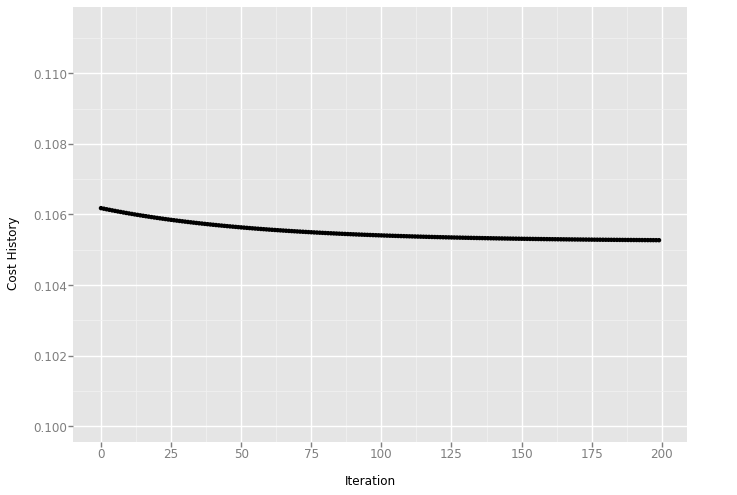

(0.0085362592274489391, <ggplot: (-9223363245723402650)>)

In [4]:
selected_symbol = "YHOO"

selected_data = prices_data[prices_data['symbol'] == selected_symbol]
selected_data['trend'] = selected_data['close'] - selected_data['open'];

def normalize_features(df):
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("not normalized!")
        
    df_normalized = (df - mu) / sigma
    return df_normalized, mu, sigma

def compute_cost(features, values, theta):
    
    m = len(values)
    
    sum_of =(numpy.square(numpy.dot(features,theta) - values).sum())
    cost = (sum_of /(2*m))
    
    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    
    m = len(values)
    cost_history = []
    
    for i in range(num_iterations):
        predicted_values = numpy.dot(features, theta)
        theta = theta - (alpha/m)*numpy.dot((predicted_values - values), features)
        
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
        
    return theta, pandas.Series(cost_history)

def compute_r_squared(val, predictions):
    SST = ((val-numpy.mean(val))**2).sum()
    SSReg = ((predictions - val)**2).sum()
    r_squared = 1 - SSReg/SST
    
    return r_squared

def plot_data(alpha, cost_history):
    cost_df = pandas.DataFrame({
        'Cost History' : cost_history,
        'Iteration' : range(len(cost_history))})
        
    return ggplot(cost_df, aes(x = 'Iteration', y = 'Cost History')) +\
    geom_point()
    
def predictions(dataframe):
    features = dataframe[['open' ,'volume']]
    
    values = dataframe['trend']
    m = len(values)
    
    features, mu, sigma = normalize_features(features)
    features['ones'] = numpy.ones(m)
    
    features_array = numpy.array(features)
    values_array = numpy.array(values)
    
    alpha = 0.01
    num_iterations = 200
    
    theta_gradient = numpy.zeros(len(features.columns))
    theta_gradient, cost_history = gradient_descent(features_array, values_array, theta_gradient, alpha, num_iterations)
    
    predictions = numpy.dot(features_array, theta_gradient)
    
    plot = plot_data(alpha, cost_history)
        
    return compute_r_squared(values_array,predictions), plot

predictions(selected_data)
